In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_orders = pd.read_csv('datasets/orders.csv')

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,20,44,45,46,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
df_orders

,province,city,status,courier,shipping_cost,jne_retur_rate,jnt_retur_rate
98443,DKI Jakarta,Kota Jakarta Barat,Success,jne,11000.0,0.058804,0.014226
97050,Riau,Kabupaten Pelalawan,Success,jne,49000.0,0.170467,0.046686
100087,Kalimantan Barat,Kabupaten Sintang,Success,jne,56000.0,0.149356,0.068244
106904,Jawa Barat,Kabupaten Bekasi,Success,jne,12000.0,0.053283,0.009921
90067,Kalimantan Barat,Kabupaten Kapuas Hulu,Success,jne,56000.0,0.149356,0.068244
...,...,...,...,...,...,...,...
49415,Jambi,Kota Jambi,Success,J&T,32000.0,0.039540,0.046543
35168,Jambi,Kabupaten Tanjung Jabung Timur,Success,J&T,71000.0,0.039540,0.046543
27119,Riau,Kota Pekanbaru,Success,J&T,44000.0,0.170467,0.046686
22422,Jawa Barat,Kota Bekasi,Success,J&T,19000.0,0.053283,0.009921


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124446 entries, 0 to 124445
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        124446 non-null  int64  
 1   invoice_number            124446 non-null  object 
 2   date                      124446 non-null  object 
 3   type                      124446 non-null  object 
 4   buyer_name                124446 non-null  object 
 5   buyer_no_telp             124446 non-null  object 
 6   buyer_address             124446 non-null  object 
 7   order_via                 124446 non-null  object 
 8   shipper_name              124446 non-null  object 
 9   shipper_no_telp           124446 non-null  object 
 10  message_for_packer        999 non-null     object 
 11  message_for_courier       5031 non-null    object 
 12  total_pay                 124446 non-null  int64  
 13  total_receivables         0 non-null       f

In [5]:
df_orders["status"].value_counts()

complete        116283
retur_verify      8163
Name: status, dtype: int64

In [6]:
df_orders["province"].value_counts()

Jawa Barat                        17409
Jawa Timur                        10022
Sumatera Utara                     9336
DKI Jakarta                        8020
Jawa Tengah                        7840
Riau                               6490
Sulawesi Selatan                   6230
Banten                             6011
Kalimantan Timur                   4225
Sumatera Selatan                   4020
Sumatera Barat                     3471
Bali                               3217
Kalimantan Barat                   2982
Sulawesi Tengah                    2980
Sulawesi Tenggara                  2586
Lampung                            2529
Jambi                              2487
Kalimantan Tengah                  2278
Nanggroe Aceh Darussalam (NAD)     2270
Kepulauan Riau                     2243
Nusa Tenggara Barat (NTB)          2126
Sulawesi Utara                     2047
Nusa Tenggara Timur (NTT)          2009
Kalimantan Selatan                 1944
DI Yogyakarta                      1276


In [7]:
df_orders['city'].unique()

array(['Kota Surabaya', 'Kabupaten Bandung Barat', 'Kabupaten Blora',
       'Kota Jakarta Timur', 'Kota Bekasi', 'Kota Padang', 'Kota Kendari',
       'Kabupaten Lampung Timur', 'Kabupaten Bogor', 'Kota Medan',
       'Kota Denpasar', 'Kabupaten Bandung', 'Kabupaten Sintang',
       'Kota Jakarta Pusat', 'Kota Jakarta Selatan', 'Kota Tangerang',
       'Kota Jakarta Barat', 'Kota Pematang Siantar', 'Kabupaten Pidie',
       'Kota Serang', 'Kota Makassar', 'Kabupaten Tulungagung',
       'Kabupaten Kepahiang', 'Kota Depok', 'Kota Ambon', 'Kota Malang',
       'Kabupaten Merangin', 'Kabupaten Pemalang', 'Kabupaten Karawang',
       'Kabupaten Kutai Kartanegara', 'Kota Bandar Lampung',
       'Kota Pekanbaru', 'Kabupaten Sidoarjo', 'Kabupaten Subang',
       'Kota Tangerang Selatan', 'Kabupaten Bantaeng', 'Kota Probolinggo',
       'Kabupaten Bantul', 'Kota Banjarmasin', 'Kabupaten Lebak',
       'Kota Jakarta Utara', 'Kota Bandung', 'Kabupaten Jember',
       'Kabupaten Barito Utara', '

In [8]:
df_orders.loc[:, "courier"].value_counts()

J&T    78619
jne    45827
Name: courier, dtype: int64

In [9]:
df_orders.loc[df_orders["status"] == "retur_verify", "courier"].value_counts()

jne    4833
J&T    3330
Name: courier, dtype: int64

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


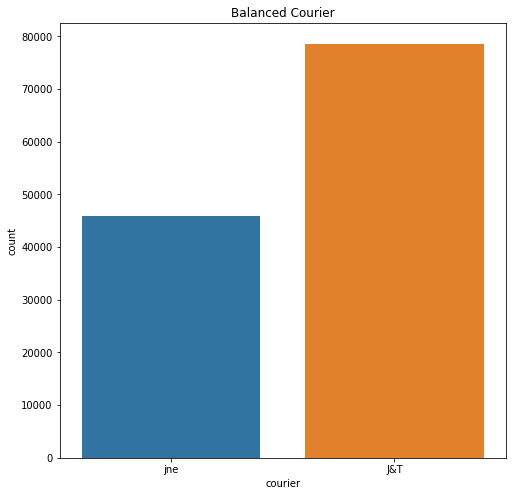

In [10]:
plt.figure(figsize=(8, 8))
sns.countplot('courier', data=df_orders)
plt.title('Balanced Courier')
plt.show()

In [11]:
# Mengambil nilai yang dibutuhkan untuk klasifikasi
df_orders = df_orders.loc[:, ["province", "city", "status", "courier","shipping_cost"]]

# Mengisi nilai kosong dengan nilai median
df_orders['shipping_cost'].fillna(df_orders['shipping_cost'].median(), inplace=True)

#Mengubah nilai status untuk retur_verify = Return dan complete = Success
df_orders["status"] = df_orders["status"].apply(lambda x: "Return" if x == "retur_verify" else "Success")

#Mengubah nilai pada kolom city yang memiliki kota Kab. menjadi Kabupaten
df_orders["city"] = df_orders["city"].apply(lambda x: x.replace("Kab.","Kabupaten") if "Kab." in x else x)

# Menambahkan kolom tingkat retur pada JNE dan J&T
df_orders = df_orders.join((df_orders.loc[(df_orders["status"] == "Return") & (df_orders["courier"] == "jne") , "province"].value_counts() / df_orders.loc[df_orders["courier"] == "jne", "province"].value_counts())
                    .rename("jne_retur_rate").to_frame(), on="province").join((df_orders.loc[(df_orders["status"] == "Return") & (df_orders["courier"] == "J&T") , "province"].value_counts() / df_orders.loc[df_orders["courier"] == "J&T", "province"].value_counts())
                    .rename("jnt_retur_rate").to_frame(), on="province")
df_orders = df_orders.fillna(0)
df_orders['jne_retur_rate'] = df_orders['jne_retur_rate'].fillna(0)



c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


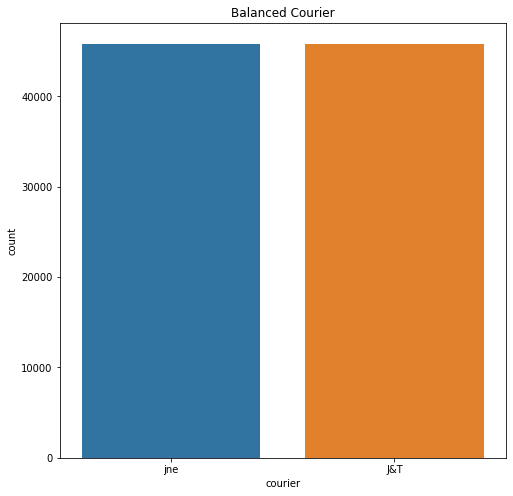

In [12]:
# Acak dataset
shuffled_df = df_orders.sample(frac=1,random_state=4)

# Pisahkan data jne
jne_df = shuffled_df.loc[shuffled_df['courier'] == "jne"]

# Mengambil 45827 data secara acak pada label J&T
jnt_df = shuffled_df.loc[shuffled_df['courier'] == "J&T"].sample(n=45827, random_state=42)

# Menggabungkan kembali kedua dataset
df_orders = pd.concat([jne_df, jnt_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('courier', data=df_orders)
plt.title('Balanced Courier')
plt.show()

In [13]:
df_orders.loc[(df_orders['courier'] == 'J&T') & (df_orders['city'] == 'Kota Jakarta Timur'), ['city','shipping_cost']].drop_duplicates()[~(df_orders['shipping_cost']==0)]['shipping_cost'].min()


C:\Users\MELTLI~1\AppData\Local\Temp/ipykernel_13380/2149117828.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orders.loc[(df_orders['courier'] == 'J&T') & (df_orders['city'] == 'Kota Jakarta Timur'), ['city','shipping_cost']].drop_duplicates()[~(df_orders['shipping_cost']==0)]['shipping_cost'].min()


12000.0

In [14]:
df_orders.dropna()

,province,city,status,courier,shipping_cost,jne_retur_rate,jnt_retur_rate
98443,DKI Jakarta,Kota Jakarta Barat,Success,jne,11000.0,0.058804,0.014226
97050,Riau,Kabupaten Pelalawan,Success,jne,49000.0,0.170467,0.046686
100087,Kalimantan Barat,Kabupaten Sintang,Success,jne,56000.0,0.149356,0.068244
106904,Jawa Barat,Kabupaten Bekasi,Success,jne,12000.0,0.053283,0.009921
90067,Kalimantan Barat,Kabupaten Kapuas Hulu,Success,jne,56000.0,0.149356,0.068244
...,...,...,...,...,...,...,...
49415,Jambi,Kota Jambi,Success,J&T,32000.0,0.124110,0.046543
35168,Jambi,Kabupaten Tanjung Jabung Timur,Success,J&T,71000.0,0.124110,0.046543
27119,Riau,Kota Pekanbaru,Success,J&T,44000.0,0.170467,0.046686
22422,Jawa Barat,Kota Bekasi,Success,J&T,19000.0,0.053283,0.009921


In [15]:

df_orders.loc[df_orders['province'] == "Nusa Tenggara Barat (NTB)", ['jne_retur_rate']] = 0.05125
df_orders.loc[df_orders['province'] == "Bangka Belitung", ['jne_retur_rate']] = 0.018471
df_orders.loc[df_orders['province'] == "Jawa Timur", ['jnt_retur_rate']] = 0.079232
df_orders.loc[df_orders['province'] == "Lampung", ['jnt_retur_rate']] = 0.092386
df_orders.loc[df_orders['province'] == "Jambi", ['jne_retur_rate']] = 0.03954
df_orders.loc[:, ["courier"]].value_counts()

courier
J&T        45827
jne        45827
dtype: int64

In [16]:
df_orders.loc[df_orders["status"] == "Return", ["courier"]].value_counts()

courier
jne        4833
J&T        1963
dtype: int64

In [17]:
df_orders["city"].unique()


array(['Kota Jakarta Barat', 'Kabupaten Pelalawan', 'Kabupaten Sintang',
       'Kabupaten Bekasi', 'Kabupaten Kapuas Hulu', 'Kabupaten Lahat',
       'Kabupaten Lombok Utara', 'Kabupaten Kotawaringin Barat',
       'Kabupaten Langkat', 'Kabupaten Temanggung', 'Kabupaten Majene',
       'Kabupaten Sukoharjo', 'Kota Padang', 'Kabupaten Kutai Timur',
       'Kabupaten Kotabaru', 'Kabupaten Bombana', 'Kabupaten Agam',
       'Kabupaten Jeneponto', 'Kabupaten Mandailing Natal',
       'Kabupaten Kediri', 'Kabupaten Sukabumi', 'Kabupaten Banyuasin',
       'Kabupaten Siak', 'Kota Medan', 'Kota Yogyakarta',
       'Kabupaten Pontianak', 'Kabupaten Soppeng', 'Kabupaten Banggai',
       'Kabupaten Sigi', 'Kabupaten Pekalongan', 'Kota Bengkulu',
       'Kota Bogor', 'Kabupaten Cirebon', 'Kabupaten Dompu',
       'Kabupaten Bogor', 'Kabupaten Barito Utara', 'Kota Jakarta Timur',
       'Kabupaten Banyumas', 'Kabupaten Labuhan Batu',
       'Kota Tangerang Selatan', 'Kabupaten Karawang', 'Kota Be

In [18]:
df_orders.loc[:, "province"].value_counts()

Jawa Barat                        12509
Jawa Timur                         7399
Sumatera Utara                     6977
DKI Jakarta                        5916
Jawa Tengah                        5803
Riau                               4903
Sulawesi Selatan                   4569
Banten                             4344
Kalimantan Timur                   3204
Sumatera Selatan                   2986
Sumatera Barat                     2575
Bali                               2375
Kalimantan Barat                   2217
Sulawesi Tengah                    2155
Lampung                            1888
Jambi                              1883
Sulawesi Tenggara                  1866
Kalimantan Tengah                  1804
Kepulauan Riau                     1615
Nanggroe Aceh Darussalam (NAD)     1589
Sulawesi Utara                     1578
Nusa Tenggara Barat (NTB)          1513
Nusa Tenggara Timur (NTT)          1478
Kalimantan Selatan                 1447
DI Yogyakarta                       936


<AxesSubplot:xlabel='province'>

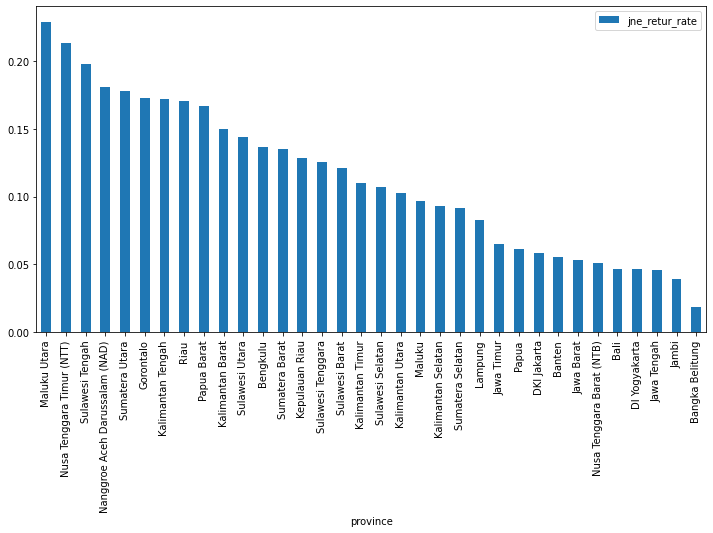

In [19]:
#JNE RETUR RATE
df_orders.loc[:,['province','jne_retur_rate']].drop_duplicates().sort_values(by=['jne_retur_rate'], ascending=False).set_index('province').plot(kind="bar", figsize=(12, 6))



<AxesSubplot:xlabel='province'>

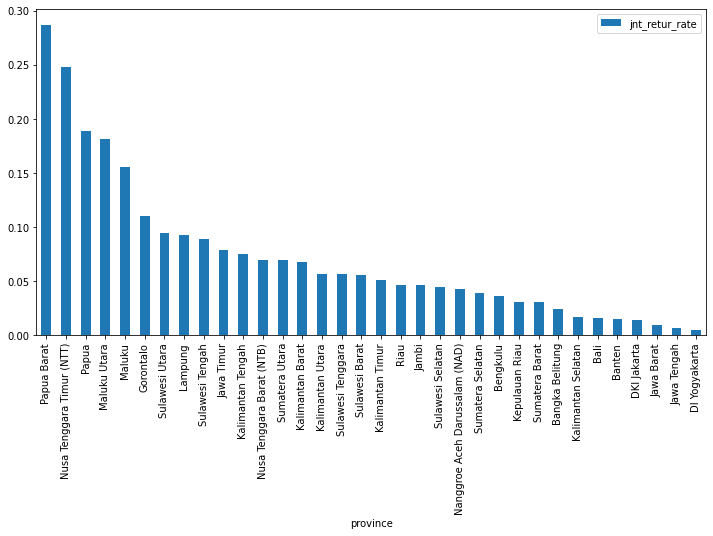

In [20]:
#JNE RETUR RATE
df_orders.loc[:,['province','jnt_retur_rate']].drop_duplicates().sort_values(by=['jnt_retur_rate'], ascending=False).set_index('province').plot(kind="bar", figsize=(12, 6))



In [21]:
# CHECK RETUR RATE
df_orders.loc[df_orders["province"] == "Nusa Tenggara Timur (NTT)", :]["jne_retur_rate"].min().astype(float) * 100.0

21.285140562248998

In [22]:
df_orders.head()

,province,city,status,courier,shipping_cost,jne_retur_rate,jnt_retur_rate
98443,DKI Jakarta,Kota Jakarta Barat,Success,jne,11000.0,0.058804,0.014226
97050,Riau,Kabupaten Pelalawan,Success,jne,49000.0,0.170467,0.046686
100087,Kalimantan Barat,Kabupaten Sintang,Success,jne,56000.0,0.149356,0.068244
106904,Jawa Barat,Kabupaten Bekasi,Success,jne,12000.0,0.053283,0.009921
90067,Kalimantan Barat,Kabupaten Kapuas Hulu,Success,jne,56000.0,0.149356,0.068244


In [23]:
#Modeling
from sklearn.preprocessing import LabelEncoder

In [24]:
df_orders

,province,city,status,courier,shipping_cost,jne_retur_rate,jnt_retur_rate
98443,DKI Jakarta,Kota Jakarta Barat,Success,jne,11000.0,0.058804,0.014226
97050,Riau,Kabupaten Pelalawan,Success,jne,49000.0,0.170467,0.046686
100087,Kalimantan Barat,Kabupaten Sintang,Success,jne,56000.0,0.149356,0.068244
106904,Jawa Barat,Kabupaten Bekasi,Success,jne,12000.0,0.053283,0.009921
90067,Kalimantan Barat,Kabupaten Kapuas Hulu,Success,jne,56000.0,0.149356,0.068244
...,...,...,...,...,...,...,...
49415,Jambi,Kota Jambi,Success,J&T,32000.0,0.039540,0.046543
35168,Jambi,Kabupaten Tanjung Jabung Timur,Success,J&T,71000.0,0.039540,0.046543
27119,Riau,Kota Pekanbaru,Success,J&T,44000.0,0.170467,0.046686
22422,Jawa Barat,Kota Bekasi,Success,J&T,19000.0,0.053283,0.009921


In [25]:

inputs = df_orders.drop(["status","courier"], axis="columns")
target = LabelEncoder().fit_transform(df_orders['courier'])

In [26]:
target.size

91654

In [27]:
le_province = LabelEncoder()

le_cities = LabelEncoder()



In [28]:
inputs['province_n'] = le_province.fit_transform(inputs['province'])
inputs['cities_n'] = le_cities.fit_transform(inputs['city'])


In [29]:
inputs_n = inputs.drop(["city","province","shipping_cost","province_n","cities_n"], axis="columns")

In [30]:
inputs_n.dropna()

,jne_retur_rate,jnt_retur_rate
98443,0.058804,0.014226
97050,0.170467,0.046686
100087,0.149356,0.068244
106904,0.053283,0.009921
90067,0.149356,0.068244
...,...,...
49415,0.039540,0.046543
35168,0.039540,0.046543
27119,0.170467,0.046686
22422,0.053283,0.009921


In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from c45 import C45
# iris = load_iris()
# clf = C45(attrNames=inputs_n.columns)
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.33)
# clf.fit(X_train, y_train)
# print(f'Accuracy: {clf.score(X_test, y_test)}')
# clf.printTree()

ModuleNotFoundError: No module named 'c45'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
clf.feature_names_in_

array(['jne_retur_rate', 'jnt_retur_rate'], dtype=object)

In [ ]:
clf.classes_

array([0, 1])

In [ ]:
X_train

,jne_retur_rate,jnt_retur_rate
8196,0.053283,0.009921
96303,0.046901,0.015818
91125,0.170467,0.046686
92409,0.046901,0.015818
108063,0.128276,0.030962
...,...,...
10416,0.109921,0.051000
93587,0.058804,0.014226
71505,0.058804,0.014226
66270,0.177478,0.069784


In [ ]:
row_jne = inputs.loc[(inputs["province"] == "Jawa Barat") & (inputs['city'] == "Kota Bogor"), :]["jne_retur_rate"].min()
row_jnt = inputs.loc[(inputs["province"] == "Jawa Barat") & (inputs['city'] == "Kota Bogor"), :]["jnt_retur_rate"].min()
row_jne

0.053282915091096596

In [ ]:
# int(df_orders.loc[(df_orders['courier'] == 'J&T') & (inputs["province"] == "Jawa Barat") & (inputs['city'] == "Kota Bogor"), ['city','shipping_cost']].drop_duplicates()[~(df_orders['shipping_cost']==0)]['shipping_cost'].min())

In [ ]:
X_test

,jne_retur_rate,jnt_retur_rate
80068,0.046901,0.015818
20723,0.053283,0.009921
107706,0.053283,0.009921
94959,0.091267,0.038847
111597,0.170467,0.046686
...,...,...
25780,0.171455,0.075063
124262,0.106767,0.044864
48683,0.051250,0.069814
111663,0.045670,0.006552


In [ ]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
# Save Model
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[7810, 7245],
       [6977, 8214]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["J&T", "jne"]))

              precision    recall  f1-score   support

         J&T       0.53      0.52      0.52     15055
         jne       0.53      0.54      0.54     15191

    accuracy                           0.53     30246
   macro avg       0.53      0.53      0.53     30246
weighted avg       0.53      0.53      0.53     30246



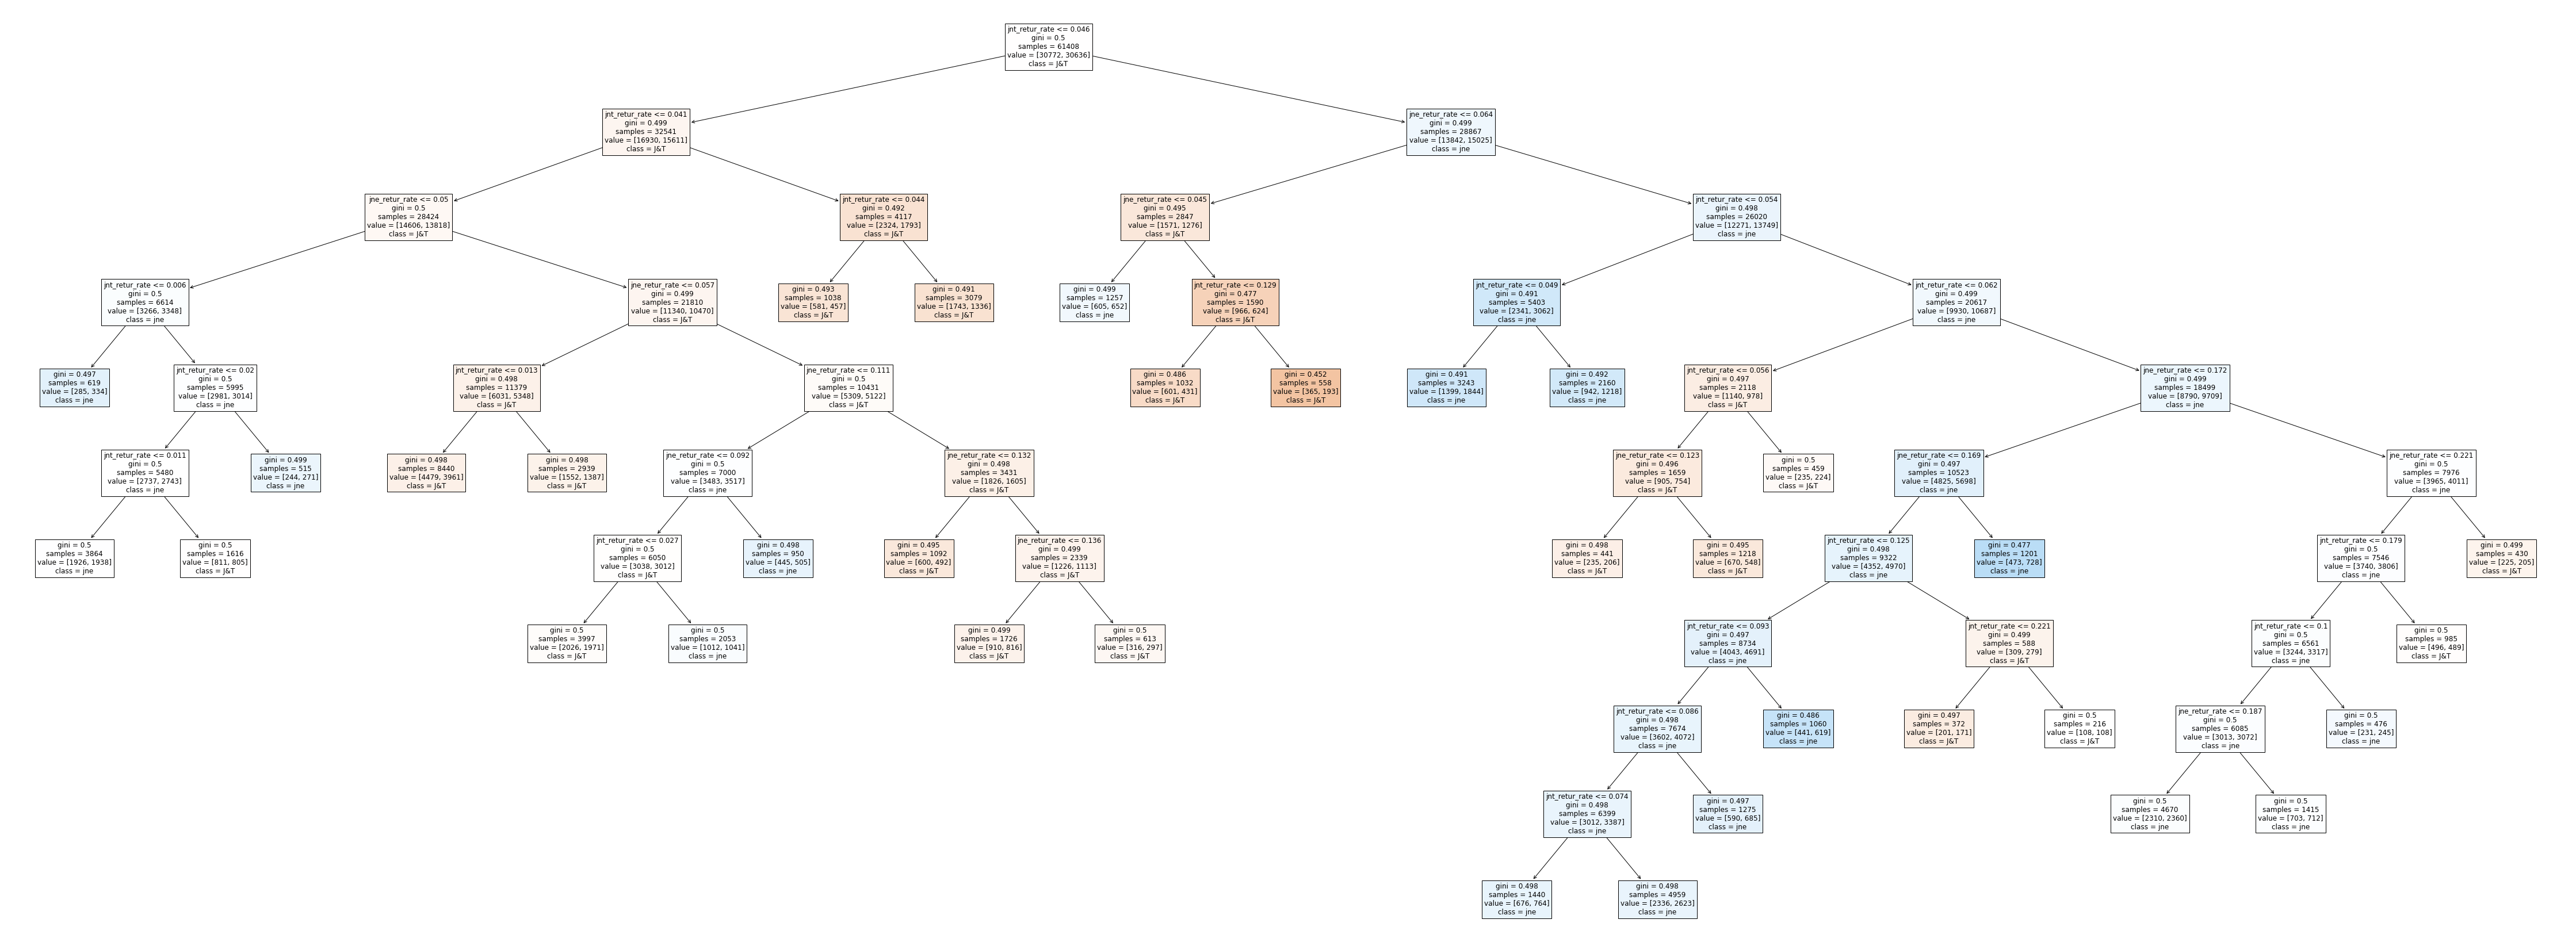

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(80, 30))
_ = tree.plot_tree(clf,feature_names=inputs_n.columns, class_names={0:"J&T", 1:"jne"},filled=True, fontsize=12)